In [1]:
import numpy as np
import pandas as pd
import os

***

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***

In [3]:
# CLEANING DATA

In [4]:
data.info()  # 81 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = data.copy()
# Filtering out columns with 80% of values identical
columns_to_drop = df.columns[[
    sum(df[col] == df[col].mode()[0])/df[col].count() > 0.8 for col in df.columns]]

print(columns_to_drop)

Index(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1',
       'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond',
       'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional',
       'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [7]:
# Visual check of the columns to drop
# for col in columns_to_drop :
#    sns.histplot(data=df,x=col)
#    plt.show()

In [8]:
df = df.drop(columns_to_drop, axis=1)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolQC', 'Fence', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
df.info()  # 51 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Alley         91 non-null     object 
 6   LotShape      1460 non-null   object 
 7   LotConfig     1460 non-null   object 
 8   Neighborhood  1460 non-null   object 
 9   HouseStyle    1460 non-null   object 
 10  OverallQual   1460 non-null   int64  
 11  OverallCond   1460 non-null   int64  
 12  YearBuilt     1460 non-null   int64  
 13  YearRemodAdd  1460 non-null   int64  
 14  RoofStyle     1460 non-null   object 
 15  Exterior1st   1460 non-null   object 
 16  Exterior2nd   1460 non-null   object 
 17  MasVnrType    588 non-null    object 
 18  MasVnrArea    1452 non-null 

In [10]:
# Filtering out columns with 80% of nan
columns_to_drop2 = df.columns[[
    df[col].isna().sum()/df[col].count() > 0.8 for col in df.columns]]

print(columns_to_drop2)

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence'], dtype='object')


In [11]:
df = df.drop(columns_to_drop2, axis=1)
df.info()  # 47 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   LotShape      1460 non-null   object 
 6   LotConfig     1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   HouseStyle    1460 non-null   object 
 9   OverallQual   1460 non-null   int64  
 10  OverallCond   1460 non-null   int64  
 11  YearBuilt     1460 non-null   int64  
 12  YearRemodAdd  1460 non-null   int64  
 13  RoofStyle     1460 non-null   object 
 14  Exterior1st   1460 non-null   object 
 15  Exterior2nd   1460 non-null   object 
 16  MasVnrArea    1452 non-null   float64
 17  ExterQual     1460 non-null   object 
 18  Foundation    1460 non-null 

In [12]:
# Remaining columns with Nans
columns_with_nan = df.columns[[df[col].isna().sum() > 0 for col in df.columns]]
print(columns_with_nan)

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'GarageType', 'GarageYrBlt', 'GarageFinish'],
      dtype='object')


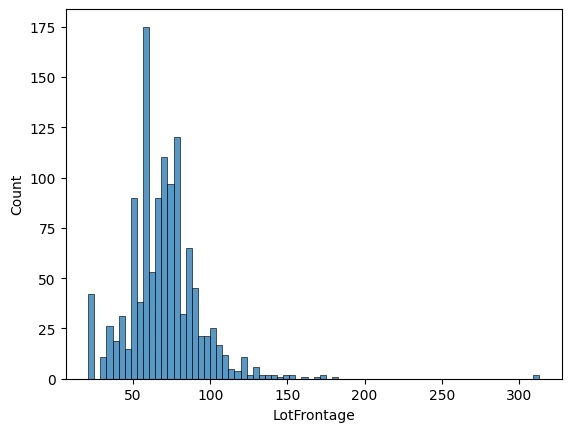

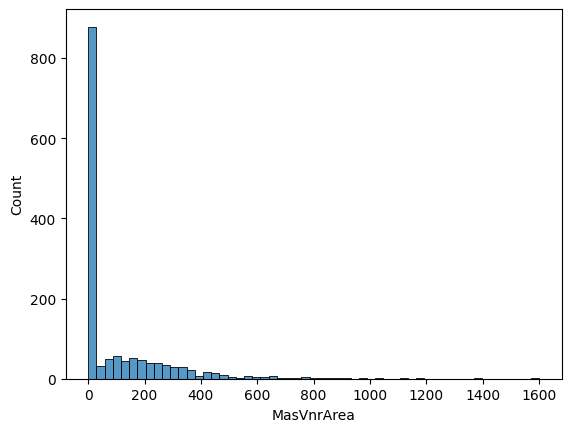

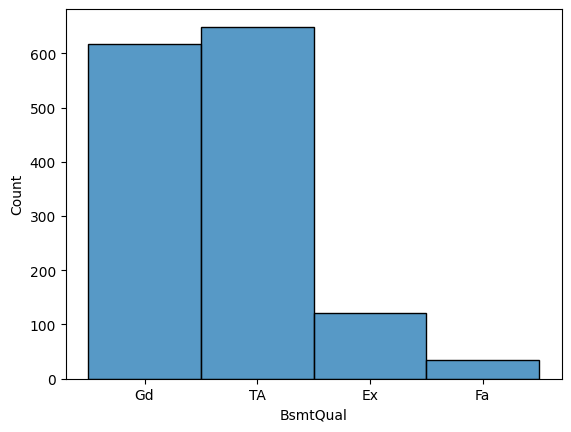

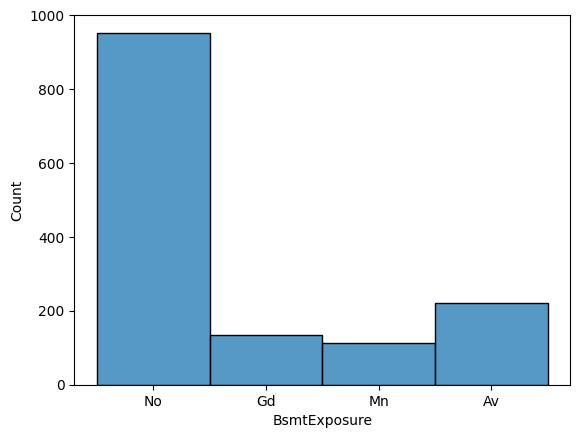

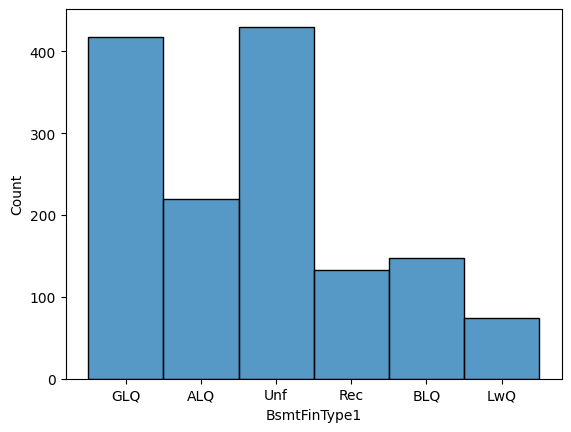

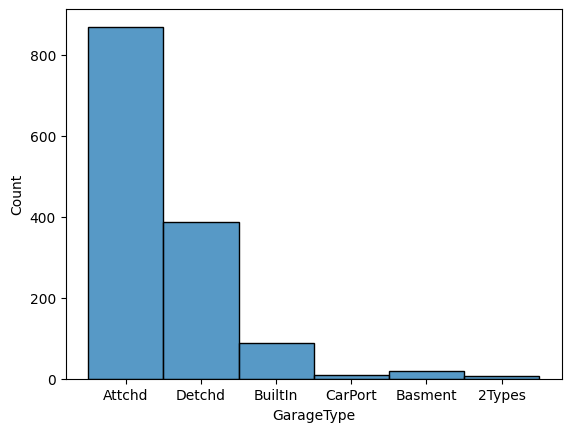

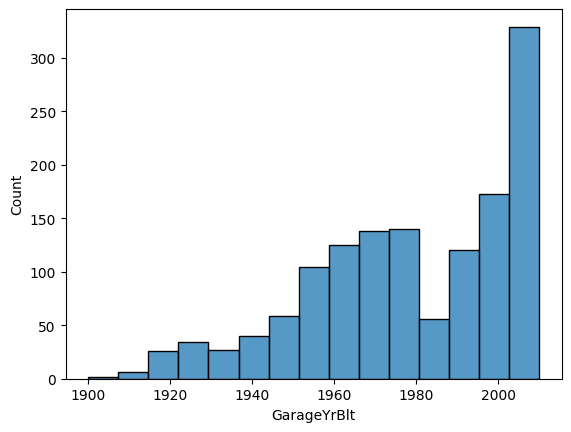

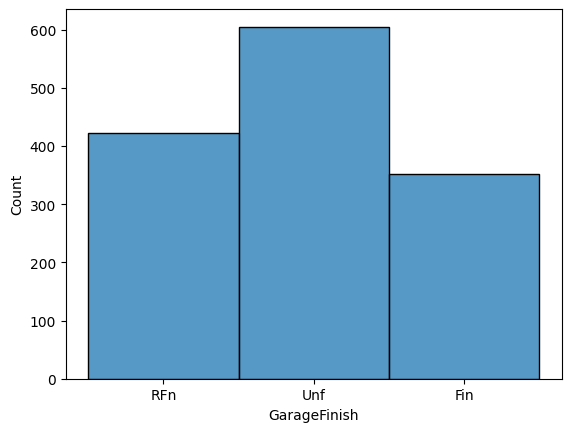

In [13]:
# Visual check of the colums with Nans
for col in columns_with_nan:
    sns.histplot(data=df, x=col)
    plt.show()

In [65]:
# df[df.MasVnrType.isna()].MasVnrArea.unique()
# all nans in MasVnrType correspond to nan in MasVnrArea ->will be filled with "None"

In [15]:
# df[df.MasVnrArea.isna()].MasVnrType.unique()
# all nans in MasVnrArea correspond to nan in MasVnrType -> will be filled with 0

In [16]:
df[df.BsmtQual.isna()].TotalBsmtSF.describe()
# all nans correspond to a surface of 0.

count    37.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: TotalBsmtSF, dtype: float64

In [17]:
df[df.BsmtQual.isna()].info()
# other related features are also nan -> BsmtQual nans will be filled with  "NA" (No Basement)

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 17 to 1412
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            37 non-null     int64  
 1   MSSubClass    37 non-null     int64  
 2   MSZoning      37 non-null     object 
 3   LotFrontage   31 non-null     float64
 4   LotArea       37 non-null     int64  
 5   LotShape      37 non-null     object 
 6   LotConfig     37 non-null     object 
 7   Neighborhood  37 non-null     object 
 8   HouseStyle    37 non-null     object 
 9   OverallQual   37 non-null     int64  
 10  OverallCond   37 non-null     int64  
 11  YearBuilt     37 non-null     int64  
 12  YearRemodAdd  37 non-null     int64  
 13  RoofStyle     37 non-null     object 
 14  Exterior1st   37 non-null     object 
 15  Exterior2nd   37 non-null     object 
 16  MasVnrArea    37 non-null     float64
 17  ExterQual     37 non-null     object 
 18  Foundation    37 non-null     obje

In [18]:
df[df.BsmtExposure.isna()].info()  # 1 non nan in BsmtQual
# BsmtQual (Gd=Good), BsmtFinType1 (Unf=Unfinshed), BsmtUnfSF>0 ->will be filled with "No" (No exposure)
# rest of nans will be filled with "NA" No Basement

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 17 to 1412
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            38 non-null     int64  
 1   MSSubClass    38 non-null     int64  
 2   MSZoning      38 non-null     object 
 3   LotFrontage   32 non-null     float64
 4   LotArea       38 non-null     int64  
 5   LotShape      38 non-null     object 
 6   LotConfig     38 non-null     object 
 7   Neighborhood  38 non-null     object 
 8   HouseStyle    38 non-null     object 
 9   OverallQual   38 non-null     int64  
 10  OverallCond   38 non-null     int64  
 11  YearBuilt     38 non-null     int64  
 12  YearRemodAdd  38 non-null     int64  
 13  RoofStyle     38 non-null     object 
 14  Exterior1st   38 non-null     object 
 15  Exterior2nd   38 non-null     object 
 16  MasVnrArea    38 non-null     float64
 17  ExterQual     38 non-null     object 
 18  Foundation    38 non-null     obje

In [19]:
# all BsmtQual are nan -> will be remplaced with "NA"  (No Basement)
df[df.BsmtFinType1.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 17 to 1412
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            37 non-null     int64  
 1   MSSubClass    37 non-null     int64  
 2   MSZoning      37 non-null     object 
 3   LotFrontage   31 non-null     float64
 4   LotArea       37 non-null     int64  
 5   LotShape      37 non-null     object 
 6   LotConfig     37 non-null     object 
 7   Neighborhood  37 non-null     object 
 8   HouseStyle    37 non-null     object 
 9   OverallQual   37 non-null     int64  
 10  OverallCond   37 non-null     int64  
 11  YearBuilt     37 non-null     int64  
 12  YearRemodAdd  37 non-null     int64  
 13  RoofStyle     37 non-null     object 
 14  Exterior1st   37 non-null     object 
 15  Exterior2nd   37 non-null     object 
 16  MasVnrArea    37 non-null     float64
 17  ExterQual     37 non-null     object 
 18  Foundation    37 non-null     obje

In [20]:
# All GarageArea are 0 -> will be filled with "NA" (No Garage)
df[df.GarageType.isna()].GarageArea.describe()

count    81.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: GarageArea, dtype: float64

In [21]:
# All GarageArea are 0 -> will be filled with 0
df[df.GarageYrBlt.isna()].GarageArea.describe()

count    81.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: GarageArea, dtype: float64

In [22]:
# All GarageArea are 0 -> will be filled with "NA" (No Garage)
df[df.GarageFinish.isna()].GarageArea.describe()

count    81.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: GarageArea, dtype: float64

In [23]:
# Columns with nans:
# Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtExposure','BsmtFinType1', 'GarageType', 'GarageYrBlt', 'GarageFinish'],dtype='object')

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
# df['MasVnrType']= df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['BsmtQual'] = df['BsmtQual'].fillna("NA")

df[df.BsmtExposure.isna()][df.BsmtQual.isna() == False].BsmtExposure = "No"
df['BsmtExposure'] = df['BsmtExposure'].fillna("NA")

df['BsmtFinType1'] = df['BsmtFinType1'].fillna("NA")
df['GarageType'] = df['GarageType'].fillna("NA")
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna("NA")

/tmp/ipykernel_19494/2550252652.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.BsmtExposure.isna()][df.BsmtQual.isna() == False].BsmtExposure = "No"


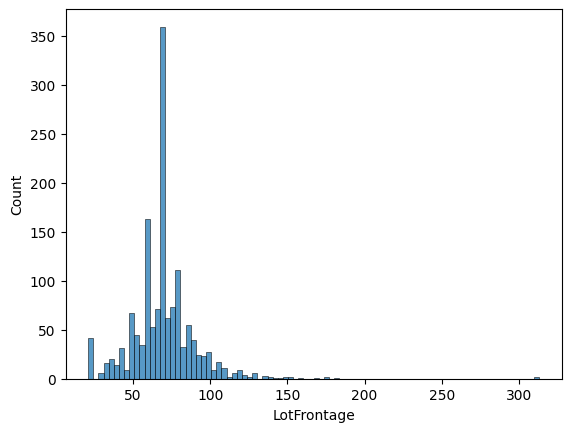

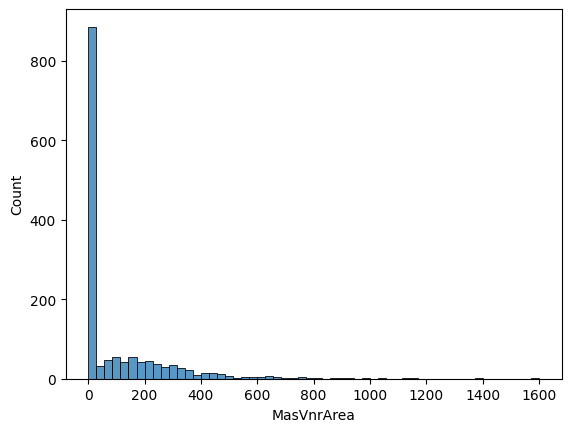

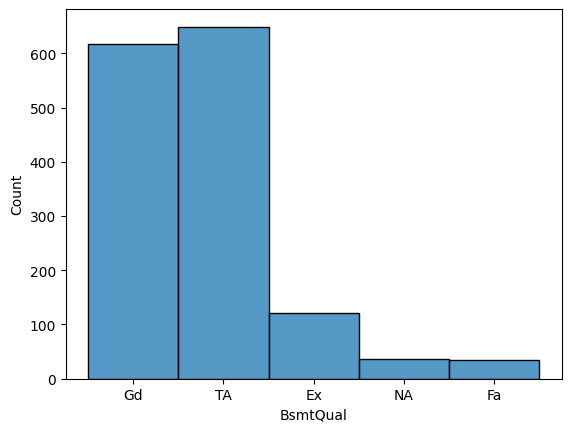

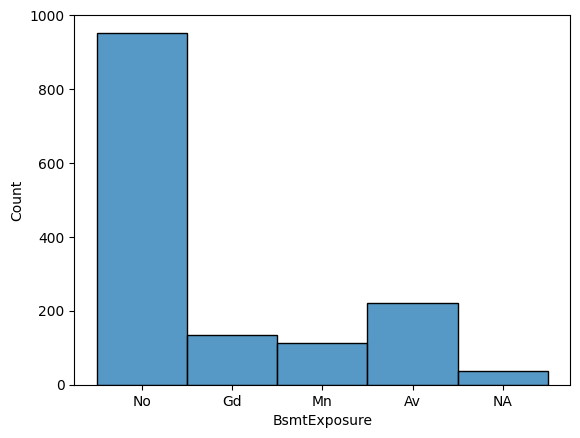

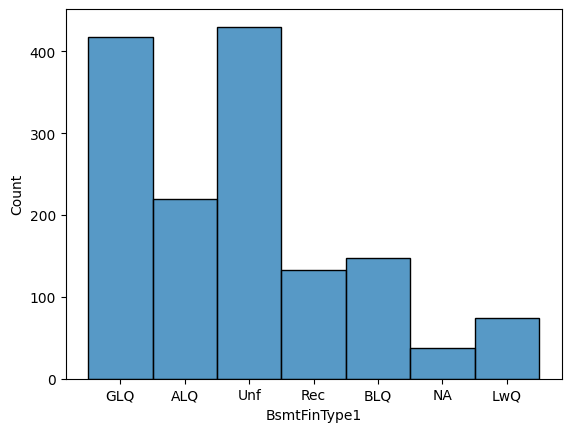

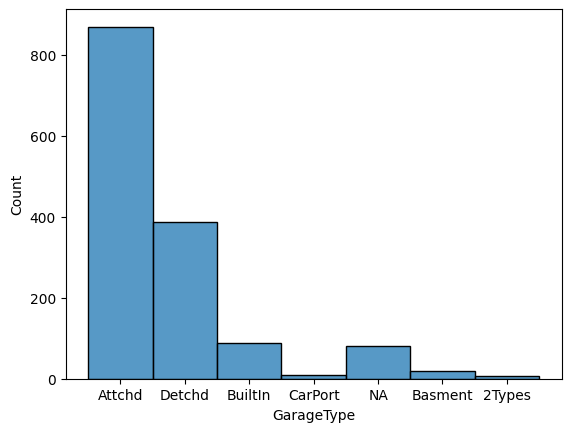

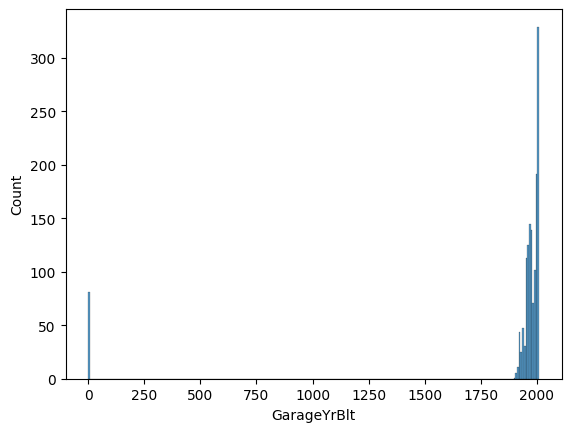

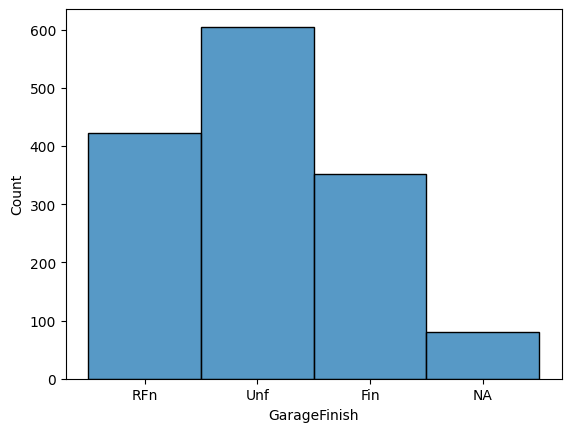

In [24]:
# Visual check of the colums with Nans
for col in columns_with_nan:
    sns.histplot(data=df, x=col)
    plt.show()

***

In [25]:
# Creating X, y and splitting into train and val

In [26]:
features_1 = df.columns
X = df[features_1]
y = X.pop('SalePrice')
X.info()  # 46 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1460 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   LotShape      1460 non-null   object 
 6   LotConfig     1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   HouseStyle    1460 non-null   object 
 9   OverallQual   1460 non-null   int64  
 10  OverallCond   1460 non-null   int64  
 11  YearBuilt     1460 non-null   int64  
 12  YearRemodAdd  1460 non-null   int64  
 13  RoofStyle     1460 non-null   object 
 14  Exterior1st   1460 non-null   object 
 15  Exterior2nd   1460 non-null   object 
 16  MasVnrArea    1460 non-null   float64
 17  ExterQual     1460 non-null   object 
 18  Foundation    1460 non-null 

In [27]:
X = pd.get_dummies(X)
X.head()  # 163 columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,True,False,False,False,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,True,False,False,False,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,True,False,False,False,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,True
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,True,False,False,False,False,False,False,False,True,False


In [28]:
X.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,2.866438,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,6.321918,2007.815753
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.815778,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,2.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,3.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,3.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,8.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000


In [29]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

***

In [30]:
# 1st Model fitting

In [31]:
from sklearn.ensemble import RandomForestRegressor
model_1 = RandomForestRegressor(n_estimators=100, random_state=0)
model_1.fit(train_X, train_y)

RandomForestRegressor(random_state=0)

In [32]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(val_y, model_1.predict(val_X))
# MAE = 17430.867506849314

17418.200410958903

***

In [33]:
# Correlated features

<Axes: >

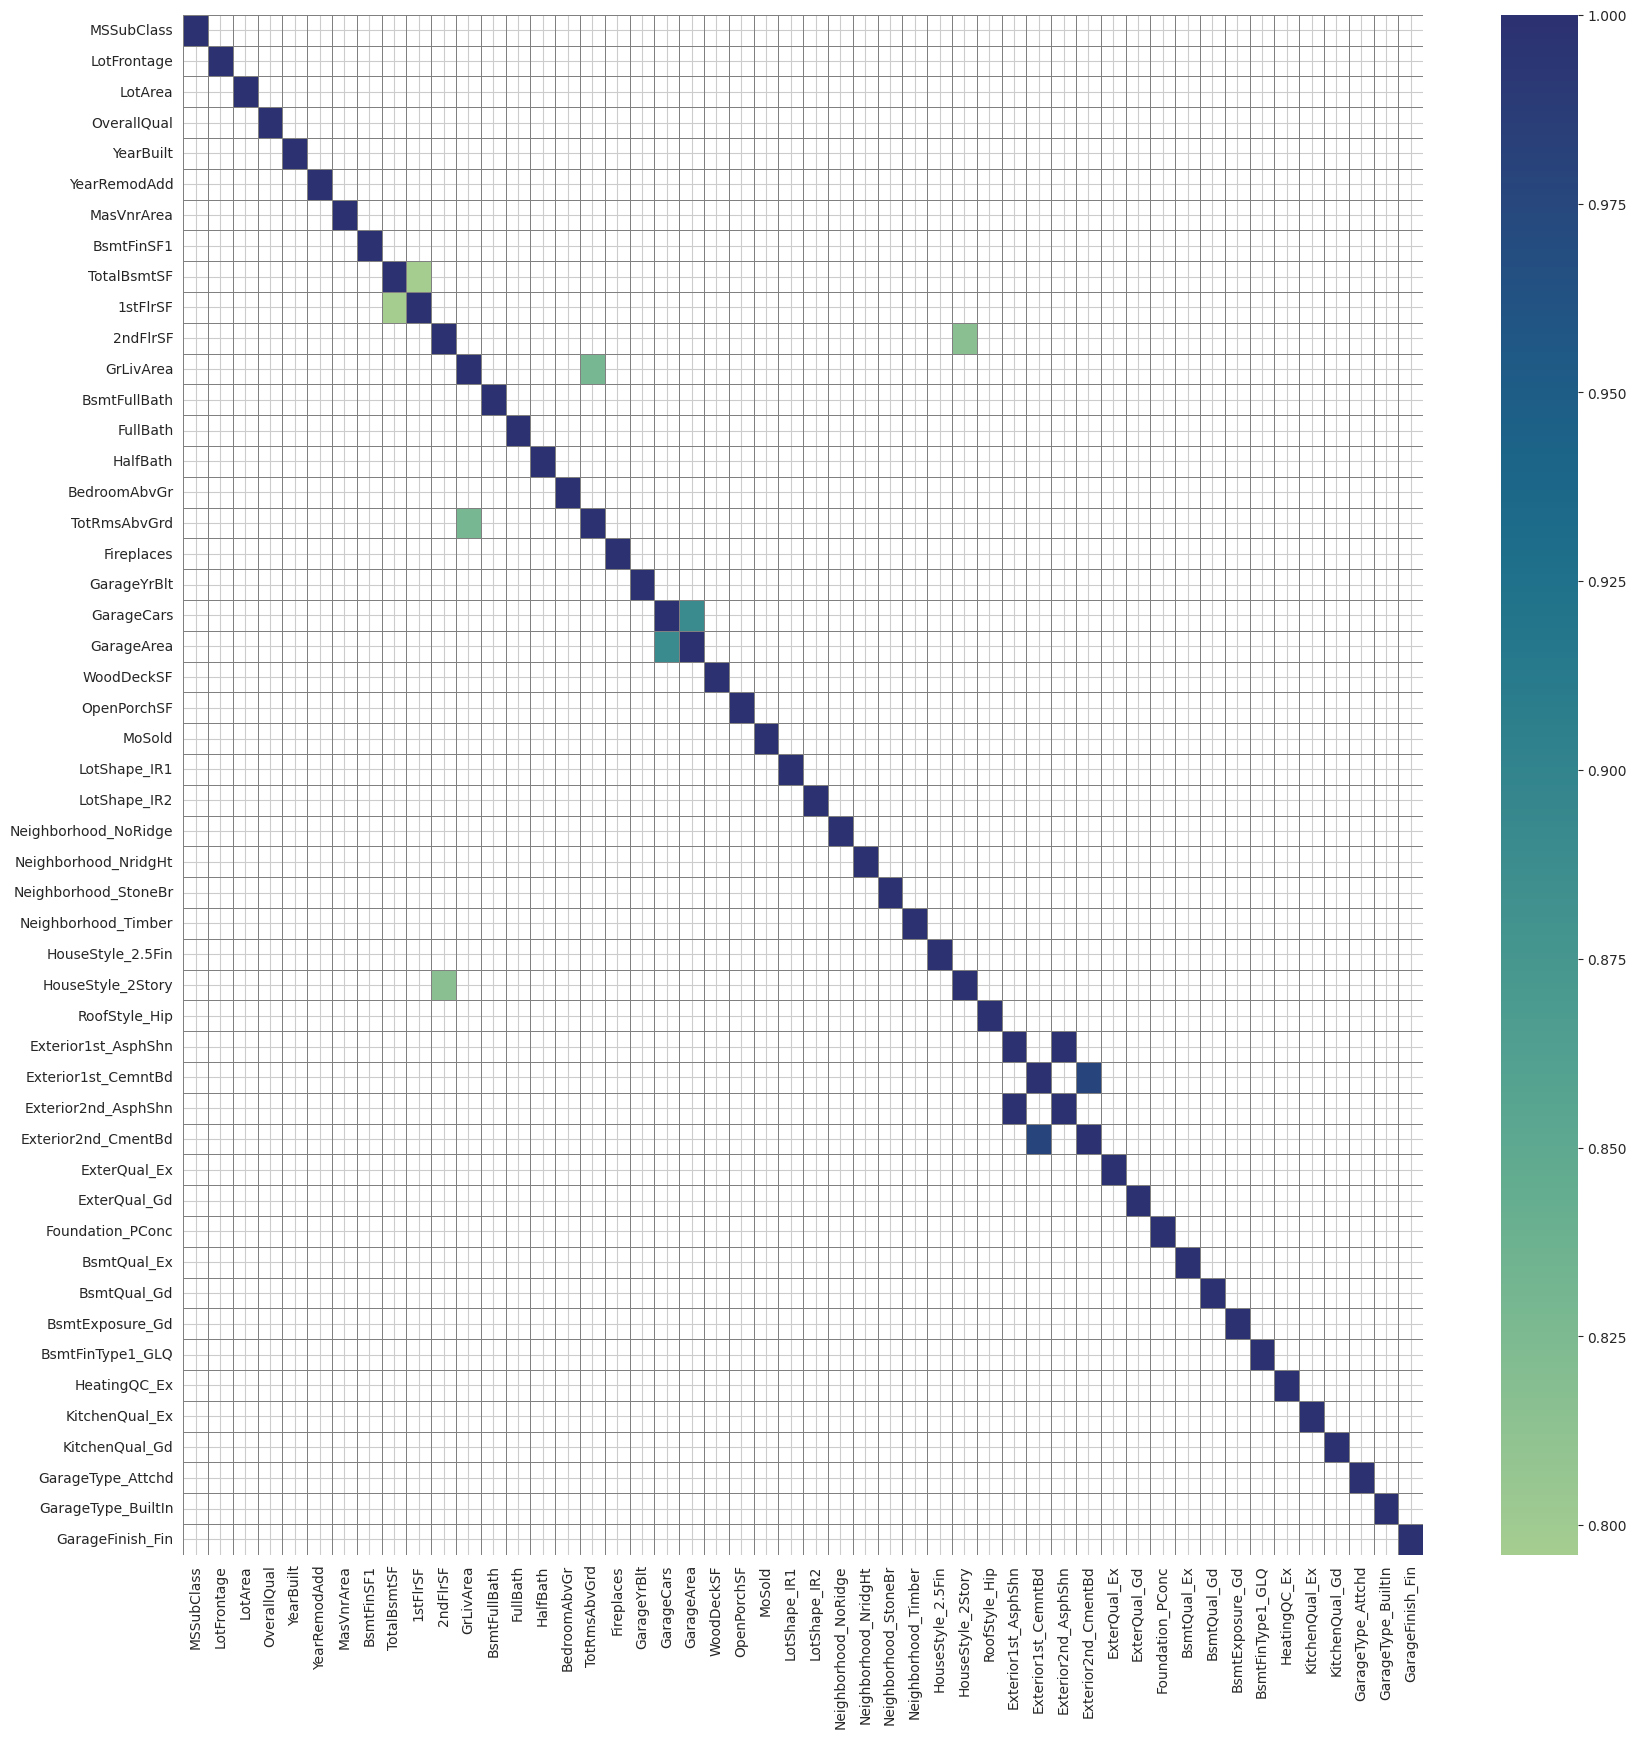

In [34]:
correlation = train_X.corr()
high_sums = [correlation[col].sum()-1 > 0.7 for col in correlation.columns]
high_corr = correlation[high_sums]
high_corr = high_corr[high_corr.index]

plt.rcParams['figure.figsize'] = 20, 20
sns.set_style("whitegrid")
sns.heatmap(high_corr, mask=high_corr < 0.7, cmap='crest',
            linewidths=0.5, linecolor='grey')

# High correlation for :
# TotalBsmtSF and 1stFlrSF
# GRLivArea and TotRmsAbvGrd
# 2ndFlrSF and HouseStyle_2Story
# GarageCars and GarageArea
# Exterior1st_CemntBd and Exterior2nd_CmentBd
# Exterior1st_AsphShn and Exterior2nd_AsphShn

In [35]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_1, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, top=10, feature_names=val_X.columns.tolist())

Weight,Feature
0.4551 ± 0.0828,OverallQual
0.1085 ± 0.0170,GrLivArea
0.0210 ± 0.0072,TotalBsmtSF
0.0164 ± 0.0026,BsmtFinSF1
0.0138 ± 0.0024,GarageCars
0.0101 ± 0.0063,1stFlrSF
0.0066 ± 0.0047,LotArea
0.0051 ± 0.0012,2ndFlrSF
0.0037 ± 0.0046,GarageArea
0.0036 ± 0.0023,YearRemodAdd


In [36]:
weights = perm.feature_importances_
Feature_weights = pd.DataFrame({'Features': val_X.columns, 'Weights': weights})
Feature_weights = Feature_weights.sort_values(by=["Weights"], ascending=False)
Feature_weights[Feature_weights['Weights'] > 0]

,Features,Weights
4,OverallQual,4.550546e-01
14,GrLivArea,1.084722e-01
11,TotalBsmtSF,2.102091e-02
9,BsmtFinSF1,1.637398e-02
22,GarageCars,1.376928e-02
...,...,...
68,HouseStyle_1.5Unf,2.867716e-06
106,Exterior2nd_Plywood,2.169201e-06
125,BsmtQual_NA,1.988829e-06
52,Neighborhood_MeadowV,1.631945e-06


In [37]:
print(Feature_weights[Feature_weights['Features'] == 'TotRmsAbvGrd'])

print(Feature_weights[Feature_weights['Features'] == '2ndFlrSF'])
print(Feature_weights[Feature_weights['Features'] == 'HouseStyle_2Story'])

print(Feature_weights[Feature_weights['Features'] == 'GarageCars'])
print(Feature_weights[Feature_weights['Features'] == 'GarageArea'])

print(Feature_weights[Feature_weights['Features'] == 'Exterior1st_CemntBd'])
print(Feature_weights[Feature_weights['Features'] == 'Exterior2nd_CmentBd'])

print(Feature_weights[Feature_weights['Features'] == 'Exterior1st_AsphShn'])
print(Feature_weights[Feature_weights['Features'] == 'Exterior2nd_AsphShn'])

# TotalBsmtSF > 1stFlrSF
# GRLivArea > TotRmsAbvGrd
# 2ndFlrSF >HouseStyle_2Story
# GarageCars > GarageArea
# Exterior1st_CemntBd < Exterior2nd_CmentBd
# Exterior1st_AsphShn and Exterior2nd_AsphShn =0
to_remove = ['1stFlrSF', 'TotRmsAbvGrd',
             'HouseStyle_2Story', 'GarageArea', 'Exterior1st_CemntBd']

        Features   Weights
19  TotRmsAbvGrd -0.001974
    Features   Weights
13  2ndFlrSF  0.005091
             Features   Weights
72  HouseStyle_2Story  0.000476
      Features   Weights
22  GarageCars  0.013769
      Features   Weights
23  GarageArea  0.003663
               Features   Weights
86  Exterior1st_CemntBd  0.000027
                Features   Weights
101  Exterior2nd_CmentBd -0.000033
               Features  Weights
82  Exterior1st_AsphShn      0.0
               Features  Weights
97  Exterior2nd_AsphShn      0.0


In [38]:
Selected_features = Feature_weights[Feature_weights['Weights'] > 0].Features.tolist(
)
len(Selected_features)  # 98

94

In [39]:
Selected_features

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'BsmtFinSF1',
 'GarageCars',
 '1stFlrSF',
 'LotArea',
 '2ndFlrSF',
 'GarageArea',
 'YearRemodAdd',
 'OverallCond',
 'OpenPorchSF',
 'YearBuilt',
 'Neighborhood_Edwards',
 'BedroomAbvGr',
 'MSZoning_RM',
 'BsmtQual_Ex',
 'BsmtExposure_No',
 'WoodDeckSF',
 'GarageType_Attchd',
 'BsmtQual_Gd',
 'BsmtUnfSF',
 'MSSubClass',
 'KitchenQual_Gd',
 'GarageFinish_Fin',
 'LotShape_IR1',
 'KitchenQual_Ex',
 'Neighborhood_StoneBr',
 'BsmtFullBath',
 'FullBath',
 'HouseStyle_2Story',
 'BsmtFinType1_GLQ',
 'ExterQual_Gd',
 'KitchenQual_TA',
 'MSZoning_RL',
 'Exterior2nd_HdBoard',
 'Exterior2nd_VinylSd',
 'YrSold',
 'BsmtExposure_Av',
 'LotShape_IR2',
 'Neighborhood_OldTown',
 'GarageType_Detchd',
 'GarageType_BuiltIn',
 'Exterior1st_BrkFace',
 'Neighborhood_Crawfor',
 'BsmtFinType1_Unf',
 'Neighborhood_NridgHt',
 'LotConfig_Corner',
 'Foundation_PConc',
 'GarageFinish_RFn',
 'GarageYrBlt',
 'Foundation_BrkTil',
 'Exterior1st_Plywood',
 'HeatingQC_Fa',
 'N

In [40]:
for item in to_remove:
    if item in Selected_features:
        Selected_features.remove(item)
len(Selected_features)  # 96

90

***

In [41]:
# 2nd Model fitting

In [42]:
X2 = X[Selected_features]
train_X, val_X, train_y, val_y = train_test_split(X2, y, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_2.fit(train_X, train_y)
mean_absolute_error(val_y, model_2.predict(val_X))
# MAE = 16800.763835616435

16442.012986301368

***

In [43]:
# 2nd model feature analysis

In [44]:
perm = PermutationImportance(model_2, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, top=10, feature_names=val_X.columns.tolist())

Weight,Feature
0.4816 ± 0.0924,OverallQual
0.1450 ± 0.0332,GrLivArea
0.0441 ± 0.0093,TotalBsmtSF
0.0238 ± 0.0114,GarageCars
0.0220 ± 0.0065,BsmtFinSF1
0.0102 ± 0.0010,2ndFlrSF
0.0081 ± 0.0046,LotArea
0.0045 ± 0.0015,YearRemodAdd
0.0045 ± 0.0021,YearBuilt
0.0031 ± 0.0010,GarageYrBlt


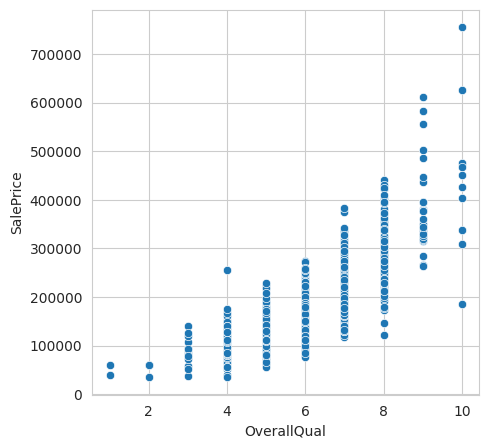

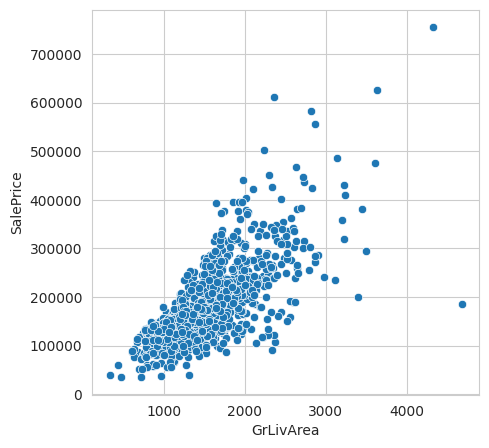

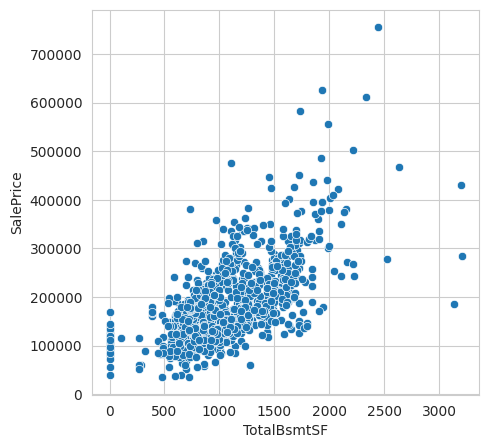

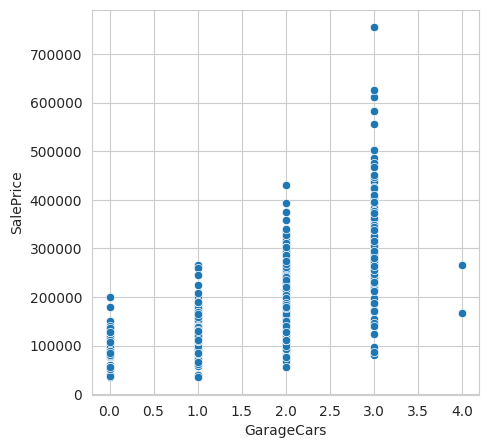

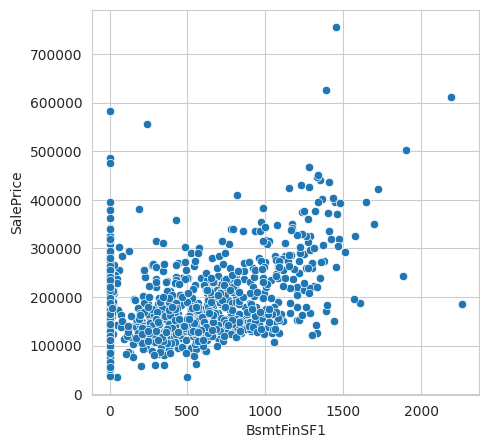

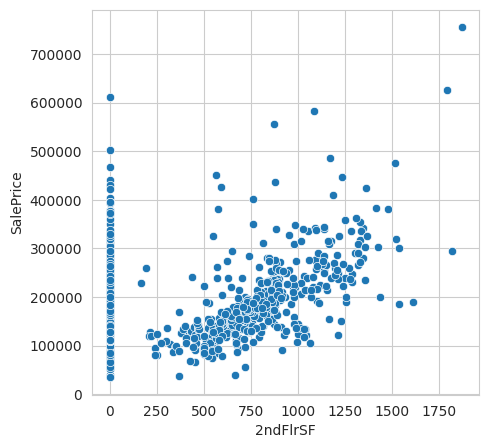

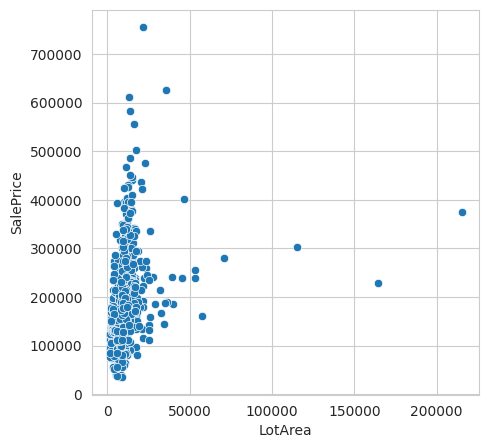

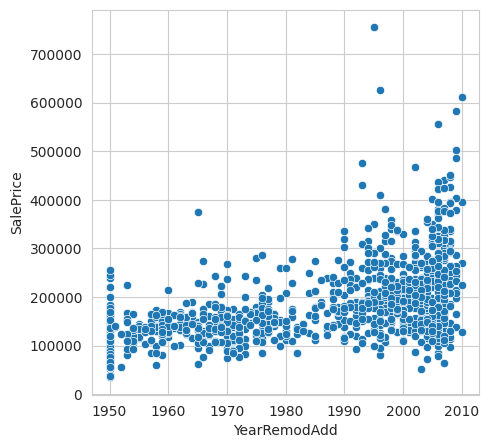

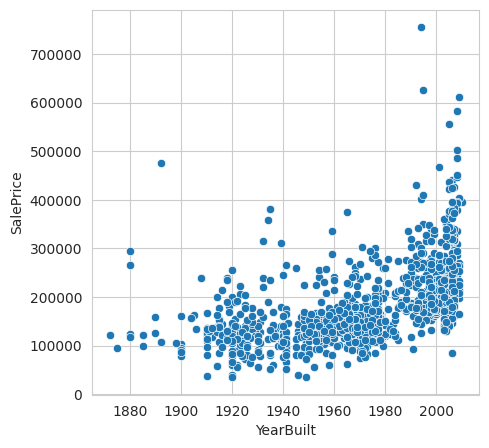

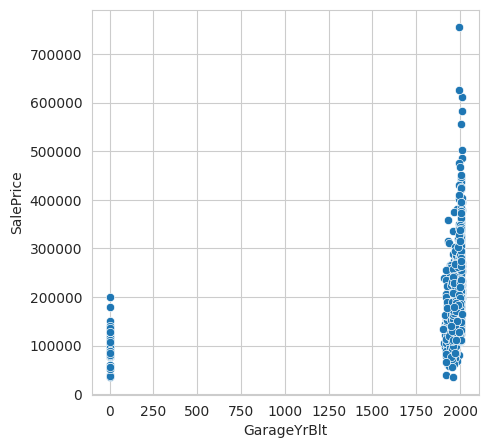

In [45]:
weights = perm.feature_importances_
Feature_weights = pd.DataFrame({'Features': val_X.columns, 'Weights': weights})
Feature_weights = Feature_weights.sort_values(by=["Weights"], ascending=False)
Top10 = Feature_weights.head(10).Features.tolist()

for feature in Top10:
    plt.rcParams['figure.figsize'] = 5, 5
    sns.scatterplot(x=train_X[feature], y=train_y)
    plt.show()

In [46]:
X3 = X2.copy()
X3['NewQual'] = (X3['OverallQual'])**2
X3 = X3.drop('OverallQual', axis=1)
X3.head()

,GrLivArea,TotalBsmtSF,BsmtFinSF1,GarageCars,LotArea,2ndFlrSF,YearRemodAdd,OverallCond,OpenPorchSF,YearBuilt,...,Neighborhood_Blmngtn,Exterior2nd_BrkFace,MSZoning_RH,LotShape_IR3,HouseStyle_1.5Unf,Exterior2nd_Plywood,BsmtQual_NA,Neighborhood_MeadowV,Exterior2nd_Stone,NewQual
0,1710,856,706,2,8450,854,2003,5,61,2003,...,False,False,False,False,False,False,False,False,False,49
1,1262,1262,978,2,9600,0,1976,8,0,1976,...,False,False,False,False,False,False,False,False,False,36
2,1786,920,486,2,11250,866,2002,5,42,2001,...,False,False,False,False,False,False,False,False,False,49
3,1717,756,216,3,9550,756,1970,5,35,1915,...,False,False,False,False,False,False,False,False,False,49
4,2198,1145,655,3,14260,1053,2000,5,84,2000,...,False,False,False,False,False,False,False,False,False,64


***

In [47]:
# 3rd Model fitting

In [48]:
train_X, val_X, train_y, val_y = train_test_split(X3, y, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3.fit(train_X, train_y)
mean_absolute_error(val_y, model_3.predict(val_X))
# MAE = 16837.17728767123

16540.45739726027

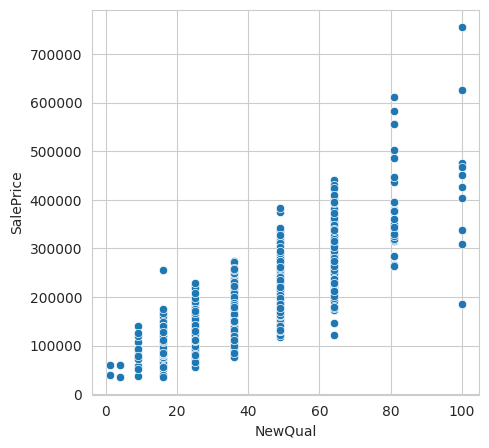

In [49]:
plt.rcParams['figure.figsize'] = 5, 5
log = np.log(train_X['NewQual'])
sns.scatterplot(x=train_X['NewQual'], y=train_y)
plt.show()

***

In [50]:
# Getting rid of outliers

In [51]:
X4 = X3.copy()
X4['SalesPrice'] = y
X4 = X4.query(
    'GrLivArea<3000 and TotalBsmtSF<2000 and BsmtFinSF1<1500 and GarageCars<4 and LotArea<50000')
y = X4.pop('SalesPrice')
X4.describe()

,GrLivArea,TotalBsmtSF,BsmtFinSF1,GarageCars,LotArea,2ndFlrSF,YearRemodAdd,OverallCond,OpenPorchSF,YearBuilt,...,WoodDeckSF,BsmtUnfSF,MSSubClass,BsmtFullBath,FullBath,YrSold,GarageYrBlt,Fireplaces,HalfBath,NewQual
count,1394.000000,1394.000000,1394.000000,1394.000000,1394.00000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,...,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,1471.941176,1016.732425,412.355093,1.727403,9672.98637,342.286944,1984.452654,5.588235,45.538020,1970.860115,...,89.984935,558.473458,57.266858,0.406743,1.543042,2007.812052,1865.922525,0.580344,0.378049,37.991392
std,459.887025,371.623988,400.912693,0.723125,4350.55598,422.226112,20.768463,1.111723,65.222588,30.023797,...,120.810848,427.123356,42.283923,0.507218,0.538481,1.330183,458.141619,0.624633,0.501089,16.225437
min,334.000000,0.000000,0.000000,0.000000,1300.00000,0.000000,1950.000000,1.000000,0.000000,1872.000000,...,0.000000,0.000000,20.000000,0.000000,0.000000,2006.000000,0.000000,0.000000,0.000000,1.000000
25%,1118.500000,788.000000,0.000000,1.000000,7440.00000,0.000000,1966.000000,5.000000,0.000000,1953.000000,...,0.000000,223.250000,20.000000,0.000000,1.000000,2007.000000,1957.000000,0.000000,0.000000,25.000000
50%,1436.500000,973.500000,369.500000,2.000000,9308.00000,0.000000,1993.000000,5.000000,24.000000,1972.000000,...,0.000000,474.000000,50.000000,0.000000,2.000000,2008.000000,1977.000000,1.000000,0.000000,36.000000
75%,1733.750000,1248.750000,686.000000,2.000000,11329.00000,728.000000,2004.000000,6.000000,66.000000,2000.000000,...,167.500000,797.750000,70.000000,1.000000,2.000000,2009.000000,2000.000000,1.000000,1.000000,49.000000
max,2978.000000,1992.000000,1480.000000,3.000000,46589.00000,1611.000000,2010.000000,9.000000,547.000000,2010.000000,...,736.000000,1935.000000,190.000000,3.000000,3.000000,2010.000000,2010.000000,3.000000,2.000000,100.000000


***

In [52]:
# 4th model fitting

In [53]:
train_X, val_X, train_y, val_y = train_test_split(X4, y, random_state=0)
model_4 = RandomForestRegressor(n_estimators=100, random_state=0)
model_4.fit(train_X, train_y)
mean_absolute_error(val_y, model_3.predict(val_X))
# MAE = 8725.755783872288

8752.30329103561

***

In [54]:
perm = PermutationImportance(model_4, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, top=10, feature_names=val_X.columns.tolist())

Weight,Feature
0.4562 ± 0.0757,NewQual
0.1836 ± 0.0195,GrLivArea
0.0539 ± 0.0126,TotalBsmtSF
0.0338 ± 0.0102,GarageCars
0.0247 ± 0.0036,BsmtFinSF1
0.0136 ± 0.0021,BsmtQual_Ex
0.0071 ± 0.0041,YearBuilt
0.0064 ± 0.0024,YearRemodAdd
0.0059 ± 0.0013,LotArea
0.0043 ± 0.0021,OverallCond


In [55]:
Final_features = X4.columns

***

In [56]:
# Making predictions for test data

In [57]:
test_data = pd.read_csv('test.csv')

test_data['NewQual'] = (test_data['OverallQual'])**2
test_data = test_data.drop('OverallQual', axis=1)
test_data.head()  # 80 col

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,NewQual
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,25
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,36
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,25
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,36
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,64


In [58]:
test_data['LotFrontage'] = test_data['LotFrontage'].fillna(
    test_data['LotFrontage'].mean())
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)
test_data['BsmtQual'] = test_data['BsmtQual'].fillna("NA")

test_data[test_data.BsmtExposure.isna()][test_data.BsmtQual.isna()
                                         == False].BsmtExposure = "No"
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna("NA")

test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna("NA")
test_data['GarageType'] = test_data['GarageType'].fillna("NA")
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)
test_data['GarageFinish'] = df['GarageFinish'].fillna("NA")

/tmp/ipykernel_19494/1862553331.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_data[test_data.BsmtExposure.isna()][test_data.BsmtQual.isna()


In [59]:
test_data.columns[[test_data[col].isna(
).sum() > 0 for col in test_data.columns]]

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'BsmtCond', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [60]:
test_data = pd.get_dummies(test_data)
X = test_data[Final_features]
X.columns[[X[col].isna().sum() > 0 for col in X.columns]]

Index(['TotalBsmtSF', 'BsmtFinSF1', 'GarageCars', 'BsmtUnfSF', 'BsmtFullBath'], dtype='object')

In [61]:
X['TotalBsmtSF'] = X['TotalBsmtSF'].fillna(0)
X['BsmtFinSF1'] = X['BsmtFinSF1'].fillna(0)
X['GarageCars'] = X['GarageCars'].fillna(0)
X['BsmtUnfSF'] = X['BsmtUnfSF'].fillna(0)
X['BsmtFullBath'] = X['BsmtFullBath'].fillna(0)

/tmp/ipykernel_19494/3747892290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalBsmtSF'] = X['TotalBsmtSF'].fillna(0)
/tmp/ipykernel_19494/3747892290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BsmtFinSF1'] = X['BsmtFinSF1'].fillna(0)
/tmp/ipykernel_19494/3747892290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [62]:
test_preds = model_4.predict(X)

In [63]:
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)